# Internal reflection and refraction.

In [62]:
from IPython.display import HTML
HTML('''
        <style>
                .prompt{display: None;}
                
                .output_wrapper button.btn.btn-default,
                .output_wrapper .ui-dialog-titlebar {display: none;} <!-- hide toolbars and buttons of the plot -->
                
        </style>
        <script>
                code_show=true; 
                function code_toggle() 
                {
                     if (code_show)
                     {
                         $('div.input').hide();
                     } else
                     {
                         $('div.input').show();
                     }
                     code_show = !code_show
                } 
                $( document ).ready(code_toggle);
        </script>
        The raw code for this IPython notebook is by default hidden for easier reading.
        To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.
        ''')

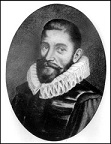
*Willebrord Snel van Royen (Leiden, 1580 – 1626), better known as Snellius*

### Internal reflection and refraction.

In this experiment we study internal reflection and refraction from the interface between a transparent medium and air.
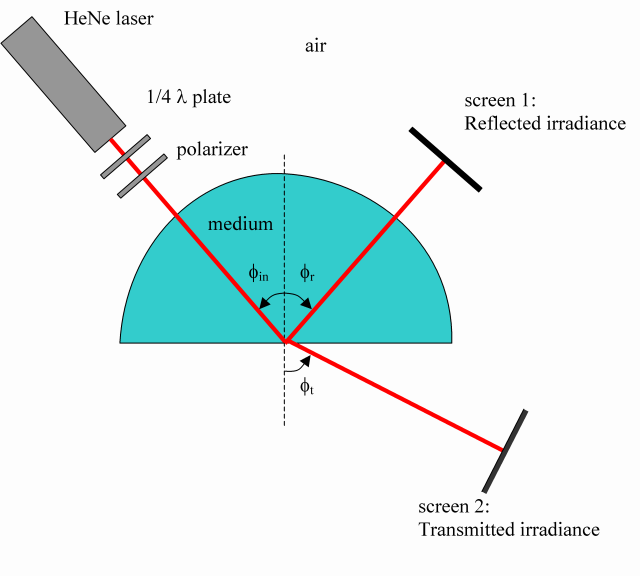
*Setup of the reflection / refraction experiment.*
    
### Total internal reflection.

According to Snell’s law the refraction angle increases when the angle of incidence increases. 
In case the refractive index of the medium is larger than that of the surrounding air, 
there will be an angle of incidence for which the refraction angle reaches its maximum value 
(i.e. $φ_{tran}$ = 90°). This angle of incidence is called the critical angle. 
For angles of incidence larger than the critical angle total internal reflection occurs.

### Brewster angle or polarizing angle.

When a beam of light is reflected from a surface the reflected irradiance depends 
on both the angle of incidence and the direction of the electric field vector of the incident beam. 
It is common to refer to the component of the electric field vector perpendicular 
to the plane of incidence, $E_s$ ( s-polarized light or TE-mode, s = ‘senkrecht’ in German) 
and the component in the plane of incidence, $E_p$ (p-polarized light or TM-mode, p = ‘parallel’). 
It can be shown that for a particular angle of incidence the $E_p$ component is entirely missing 
from the reflected beam. This angle is called the Brewster or polarizing angle. 
The effect occurs for both internal as external reflection.

Both the irradiances from reflection and transmission can be measured with screen 1 and 2 
respectively (CCD cameras). The beam from the HeNe laser is linearly polarized. 
The polarization (or plane of vibration of the electric field) can be adjusted using a $\frac{1}{4}\lambda$ wave plate and a polarizer. 
The medium has the shape of a half cylinder so that the incident beam is always perpendicular 
to the air-medium interface. With this experiment the refractive index of the medium can be determined. 
Reflections from the cylinder surface can be neglected.

### Measurement of the refractive index of the medium.
   1.  Derive an expression that yields the refractive index from the measurable quantities.
   2.  Determine the refractive index of the medium.
   3.  For one particular angle of incidence and polarization it is possible to reduce the 
        reflected irradiance to zero. Calculate this angle from the measured index and verify 
        it with an experiment. The polarization is defined as the angle of the plane of 
        vibration of the electric field vector with respect to the plane of incidence.

### Questions.
   1.  How is the angle of incidence called where no reflection takes place? 
        Give one important application of a window that is positioned at this angle.
        Which component of the reflected beam is missing at this angle?
   2.  Prove that the sum of these angles at internal and external reflection respectively is exactly $90°$.
        A dielectric surface positioned at proper angle of incidence can be used as a polarizer 
        to produce linear polarized light from an un-polarized input beam. 
        Why is such a polarizer seldom used in practice in spite of the fact that the 
        set-up is very cheap and simple compared to other polarizers?

Literature: Pedrotti, 3rd ed., chapter 2 and chapter 15-2. https://www.amazon.com/Introduction-Optics-3rd-Frank-Pedrotti/dp/0131499335


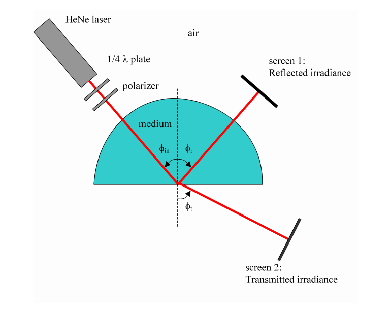

interactive(children=(FloatSlider(value=40.0, continuous_update=False, description='$\\phi_{in}$ [deg]', max=9…

In [63]:
%matplotlib inline
#!/usr/bin/env python
"""
    Computer practical 2. Internal reflection and refraction.
    =========================================================

    This is part of the 'computer practical' set of assignments.
    Demonstrates internal reflection and refraction.
    Find the Brewster- and critical angle and from this determine
    the refractice index of the glass.
"""
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
import math
from LightPipes import *

rad = math.pi/180.0
wavelength=632.8*nm;
Nair = 1.0;
Nglass = 1.53

size = 5.0*mm;
N=50

img=mpimg.imread('images/ReflectSetup.png');
fig=plt.figure(figsize=(9,6));
gridspec.GridSpec(3,3);
ax1=plt.subplot2grid((3,3), (0,0), colspan=2, rowspan=3);

ax1.axis('off')
plt.imshow(img);

def ReflectRefractSim(PhiIn,PhiPol):
    F=Begin(size,wavelength,N)
    I_s = math.pow(math.sin(PhiPol * rad), 2.0)
    I_p = math.pow(math.cos(PhiPol * rad), 2.0)
    PIn = PhiIn * rad
    P = Nglass * math.sin(PIn) / Nair
    if (P >= 1.0):
        T_s = 0.0
        T_p = 0.0
    else:
        PhiT = math.asin(P);
        if (PIn == 0.0 and PhiT == 0.0):
            T_s = 4.0 * Nair * Nglass/math.pow(Nair + Nglass,2.0);
            T_p = T_s;
        else:
            T_s = Nair * math.cos(PhiT) * math.cos(PIn) / Nglass * math.pow(2.0*math.sin(PhiT) / math.sin(PIn + PhiT), 2.0);
            T_p = Nair * math.cos(PhiT) * math.cos(PIn) / Nglass * math.pow(2.0*math.sin(PhiT) / (math.sin(PIn + PhiT)*math.cos(PIn - PhiT)), 2.0);
    R_s = 1.0 - T_s;
    R_p = 1.0 - T_p;
    I_T = T_s * I_s + T_p * I_p;
    I_R = R_s * I_s + R_p * I_p;
    F1=GaussHermite(0,0,I_R,size/4,F);
    F2=GaussHermite(0,0,I_T,size/4,F);
    txt1 = "Reflected power = %3.2f mW"% I_R
    txt2 = "Transmitted power = %3.2f mW"%I_T

    I1=Intensity(0,F1);
    I2=Intensity(0,F2);
    ax2=plt.subplot2grid((3,3), (1,0))
    ax2.contourf(I1,10,vmin=0., vmax=1.,cmap='hot'); ax2.axis('off'); ax2.axis('equal')
    ax2.set_title( txt1) 

    ax3=plt.subplot2grid((3,3), (1,2))
    ax3.contourf(I2,10,vmin=0., vmax=1.,cmap='hot'); ax3.axis('off'); ax3.axis('equal')
    ax3.set_title(txt2)
    plt.show()

w=interact(ReflectRefractSim,
           PhiIn=widgets.FloatSlider(description='$\phi_{in}$ [deg]',
                                      min=0.0,max=90.0,step=0.1,value=40.0,
                                      continuous_update=False,readout_format='.1f'),
           PhiPol=widgets.FloatSlider(description='$\phi_{pol}$ [deg]',
                                      min=0.0,max=90.0,step=0.1,value=79.0,
                                      continuous_update=False,readout_format='.1f'),          
          );



help: https://opticspy.github.io/lightpipes/Reflect.html